In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('CCTV_in_Seoul.csv', index_col='기관명')
df

소계  2013년도 이전  2014년  2015년  2016년
기관명                                       
강남구   2780       1292    430    584    932
강동구    773        379     99    155    377
강북구    748        369    120    138    204
강서구    884        388    258    184     81
관악구   1496        846    260    390    613
광진구    707        573     78     53    174
구로구   1561       1142    173    246    323
금천구   1015        674     51    269    354
노원구   1265        542     57    451    516
도봉구    485        238    159     42    386
동대문구  1294       1070     23    198    579
동작구   1091        544    341    103    314
마포구    574        314    118    169    379
서대문구   962        844     50     68    292
서초구   1930       1406    157    336    398
성동구   1062        730     91    241    265
성북구   1464       1009     78    360    204
송파구    618        529     21     68    463
양천구   2034       1843    142     30    467
영등포구   904        495    214    195    373
용산구   1624       1368    218    112    398
은평구   1873       1138    224    278    468
종로구   1002        464    314    211    630
중구     671        413    190     72    348
중랑구    660        509    121    177    109

In [ ]:
1. 2014년, 15년에 대한 바차트를 그리시오
2. cctv 소계가 가장 많은 top5 기관명(2014년 기준)
총CCTV설치수 컬럼을 추가하시요
3.최근 2년동안 cctv 증가율을 구하시오
4. cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
5. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오
6. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성

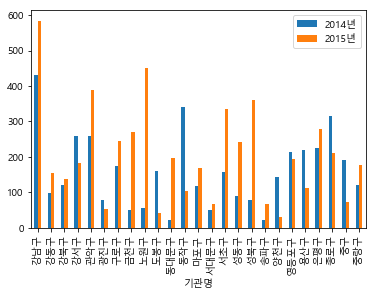

In [8]:
df[['2014년','2015년']].plot(kind='bar')
plt.show()

In [13]:
df.sort_values(by='2014년', ascending=False)[:5].index

Index(['강남구', '동작구', '종로구', '관악구', '강서구'], dtype='object', name='기관명')

In [17]:
df[-1]/df['2015년']*100

기관명
강남구      159.589041
강동구      243.225806
강북구      147.826087
강서구       44.021739
관악구      157.179487
광진구      328.301887
구로구      131.300813
금천구      131.598513
노원구      114.412417
도봉구      919.047619
동대문구     292.424242
동작구      304.854369
마포구      224.260355
서대문구     429.411765
서초구      118.452381
성동구      109.958506
성북구       56.666667
송파구      680.882353
양천구     1556.666667
영등포구     191.282051
용산구      355.357143
은평구      168.345324
종로구      298.578199
중구       483.333333
중랑구       61.581921
dtype: float64

In [19]:
# 4. cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
df['설치 정도'] = df['소계'].apply(lambda v: '높음' if v>=1000 else '낮음')
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도
기관명                                             
강남구   2780       1292    430    584    932    높음
강동구    773        379     99    155    377    낮음
강북구    748        369    120    138    204    낮음
강서구    884        388    258    184     81    낮음
관악구   1496        846    260    390    613    높음
광진구    707        573     78     53    174    낮음
구로구   1561       1142    173    246    323    높음
금천구   1015        674     51    269    354    높음
노원구   1265        542     57    451    516    높음
도봉구    485        238    159     42    386    낮음
동대문구  1294       1070     23    198    579    높음
동작구   1091        544    341    103    314    높음
마포구    574        314    118    169    379    낮음
서대문구   962        844     50     68    292    낮음
서초구   1930       1406    157    336    398    높음
성동구   1062        730     91    241    265    높음
성북구   1464       1009     78    360    204    높음
송파구    618        529     21     68    463    낮음
양천구   2034       1843    142     30    467    높음
영등포구   904        495    214    195    373    낮음
용산구   1624       1368    218    112    398    높음
은평구   1873       1138    224    278    468    높음
종로구   1002        464    314    211    630    높음
중구     671        413    190     72    348    낮음
중랑구    660        509    121    177    109    낮음

In [40]:
# 5. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오
df[df['2016년']==df['2016년'].max()][['2015년', '2014년']]

2015년  2014년
기관명              
강남구    584    430

In [48]:
# 6. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
# 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성
def fn(v):
    if v>=1.2:
        return '급증'
    elif v>=1:
        return '보통'
    else:
        return '낮음'
df1 = df['2016년']/df['2013년도 이전']
df['2013이전-2016년 증가율'] = df1.apply(fn)
df

소계  2013년도 이전  2014년  2015년  2016년 설치 정도 2013이전-2016년 증가율
기관명                                                              
강남구   2780       1292    430    584    932    높음               낮음
강동구    773        379     99    155    377    낮음               낮음
강북구    748        369    120    138    204    낮음               낮음
강서구    884        388    258    184     81    낮음               낮음
관악구   1496        846    260    390    613    높음               낮음
광진구    707        573     78     53    174    낮음               낮음
구로구   1561       1142    173    246    323    높음               낮음
금천구   1015        674     51    269    354    높음               낮음
노원구   1265        542     57    451    516    높음               낮음
도봉구    485        238    159     42    386    낮음               급증
동대문구  1294       1070     23    198    579    높음               낮음
동작구   1091        544    341    103    314    높음               낮음
마포구    574        314    118    169    379    낮음               급증
서대문구   962        844     50     68    292    낮음               낮음
서초구   1930       1406    157    336    398    높음               낮음
성동구   1062        730     91    241    265    높음               낮음
성북구   1464       1009     78    360    204    높음               낮음
송파구    618        529     21     68    463    낮음               낮음
양천구   2034       1843    142     30    467    높음               낮음
영등포구   904        495    214    195    373    낮음               낮음
용산구   1624       1368    218    112    398    높음               낮음
은평구   1873       1138    224    278    468    높음               낮음
종로구   1002        464    314    211    630    높음               급증
중구     671        413    190     72    348    낮음               낮음
중랑구    660        509    121    177    109    낮음               낮음